In [127]:
import re
import numpy as np 
import pandas as pd 
import arabic_reshaper as ar
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bidi.algorithm import get_display
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

In [106]:
ds = 'ArSAS.txt'

df = pd.read_csv(ds, sep='\t')

In [107]:
df

,#Tweet_ID,Tweet_text,Topic,Sentiment_label,Sentiment_label_confidence,Speech_act_label,Speech_act_label_confidence
0,929241870508724224,المباراة القـادمة #غانا x #مصر الجولة الأخيرة ...,Event,Positive,0.38,Assertion,0.62
1,928942264583376897,هل هذه هي سياسة خارجيه لدوله تحترم نفسها والآخ...,Entity,Negative,1.00,Expression,0.68
2,928615163250520065,وزير خارجية فرنسا عن منتدى شباب العالم: شعرت ب...,Event,Positive,0.69,Assertion,1.00
3,931614713368186880,ومع السيسي و بشار و ايران و بن زايد و والا خلي...,Event,Negative,1.00,Expression,1.00
4,929755693011427331,أهداف مباراة غانا 0 مصر 1 تصفيات كأس العالم 20...,Event,Neutral,1.00,Assertion,1.00
...,...,...,...,...,...,...,...
19892,929109605267000960,ملخص مباراة نيجيريا vs الجزائر تصفيات كأس 🏆 ال...,Event,Neutral,1.00,Assertion,1.00
19893,930131859039837952,ايطاليا في السان سيرو لعبت 42 مباراة 🇮🇹 31 فوز...,Event,Positive,0.69,Expression,0.69
19894,928739551136361984,المُلحق المؤهل لكأس العالم 🇪🇺أوروبا🇪🇺 مباراة ا...,Event,Neutral,1.00,Assertion,1.00
19895,929254320754823168,رسائل وتوصيات منتدى شباب العالم .. د. عبدالله ...,Event,Neutral,1.00,Assertion,1.00


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19897 entries, 0 to 19896
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #Tweet_ID                    19897 non-null  int64  
 1   Tweet_text                   19897 non-null  object 
 2   Topic                        19897 non-null  object 
 3   Sentiment_label              19897 non-null  object 
 4   Sentiment_label_confidence   19897 non-null  float64
 5   Speech_act_label             19897 non-null  object 
 6   Speech_act_label_confidence  19897 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


In [87]:
df.Tweet_text[7]

'يعنى رايح تعتقل ماهيتور المصرى تانى بحجة اشتراكها فى مظاهرة بمصرية تيران وصنافير من 6 شهور ! هو يعنى سجلك الزفت... https://t.co/LrzuXGTi'

In [96]:
p = re.compile(r"\s?https://.+/.+\s?")


In [111]:
# all tweets to text 
text = ar.reshape(" ".join(re.sub(p, ' ', t) for t in df.Tweet_text[:50]))
text = get_display(text)
# print(text)

In [114]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the color mapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or :rc:`image.interpolation`

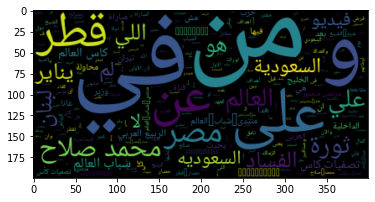

In [115]:
wordcloud = WordCloud(max_words=300, font_path='NotoNaskhArabic-Regular.ttf').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

In [116]:
df.columns

Index(['#Tweet_ID', 'Tweet_text', 'Topic', 'Sentiment_label',
       'Sentiment_label_confidence', 'Speech_act_label',
       'Speech_act_label_confidence'],
      dtype='object')

In [117]:
df.Topic.value_counts()

Event            8288
Entity           5810
Long_Standing    5799
Name: Topic, dtype: int64

/Users/spydermac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment_label', ylabel='count'>

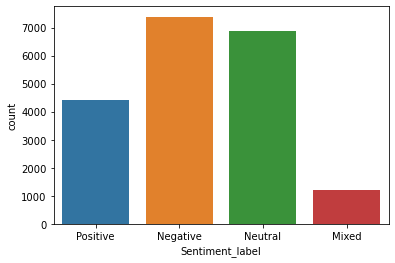

In [121]:
sns.countplot(df.Sentiment_label)

['Assertion' 'Expression' 'Question' 'Request' 'Recommendation'
 'Miscellaneous']


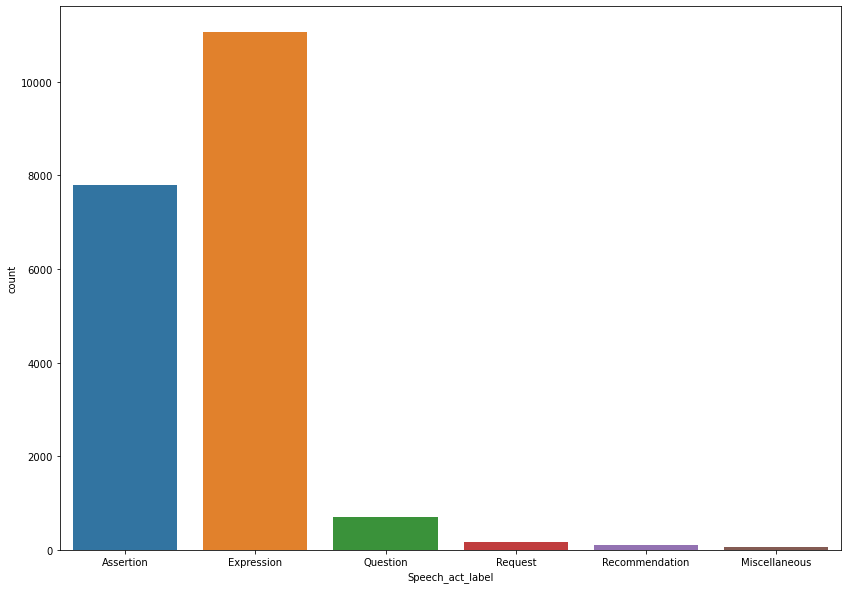

In [132]:
print(df.Speech_act_label.unique())
plt.figure(figsize=(14,10))
sns.countplot(df.Speech_act_label);

In [130]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or li